# Convolutional Neural Network

![image-14](image-14.png)


Convolutional Layer reduces the size of image while maintaining the relationship.

![image-15](image-15.png)


### Max Pooling 
- Reduces the computational cost by reducing the size of image, reduces the parameters the model has to learn and avoids overfitting by providing the abstract of an image.
![image-16](image-16.png)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Hyperparameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

Normalize does the following for each channel:

image = (image - mean) / std

The parameters mean, std are passed as 0.5, 0.5 in your case. This will normalize the image in the range [-1,1]. For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted to (1-0.5)/0.5=1.

if you would like to get your image back in [0,1] range, you could use,

image = ((image * std) + mean)

In [13]:
# dataset has images range [0,1]
# so transform them to nonrmalized range [-1,1]
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [44]:
# Loading dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=True,
                                            download=True,
                                            transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=False,
                                            download=True,
                                            transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [45]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [46]:
train_dataset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [47]:
train_dataset[0][1]

6

In [48]:
# DataLoader object
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [49]:
train_loader

In [50]:
classes = ('plane','car','bird','cat',
          'deer','dog','frog','horse','ship','truck')

In [51]:
# example
train = iter(train_loader)
samples, labels = next(train)
samples.shape

torch.Size([4, 3, 32, 32])

In [69]:
samples[0] #4 images in a batch

tensor([[[-0.5137, -0.5137, -0.5059,  ..., -0.6784, -0.7176, -0.7412],
         [-0.4039, -0.4039, -0.4039,  ..., -0.5765, -0.6235, -0.6549],
         [-0.2941, -0.3020, -0.3020,  ..., -0.4745, -0.5294, -0.5608],
         ...,
         [ 0.6863,  0.2471,  0.3020,  ...,  0.8431,  0.8275,  0.8275],
         [ 0.6627,  0.4667,  0.6784,  ...,  0.8431,  0.8275,  0.8275],
         [ 0.8118,  0.8118,  0.8353,  ...,  0.8353,  0.8353,  0.8275]],

        [[ 0.2392,  0.2235,  0.2392,  ...,  0.1608,  0.1529,  0.1451],
         [ 0.2706,  0.2627,  0.2627,  ...,  0.2000,  0.1765,  0.1686],
         [ 0.3020,  0.2863,  0.2784,  ...,  0.2392,  0.2000,  0.2000],
         ...,
         [ 0.6706,  0.2549,  0.3255,  ...,  0.8275,  0.8118,  0.8118],
         [ 0.6549,  0.4745,  0.7020,  ...,  0.8275,  0.8118,  0.8118],
         [ 0.8039,  0.8118,  0.8431,  ...,  0.8196,  0.8196,  0.8118]],

        [[ 0.5686,  0.5529,  0.5686,  ...,  0.5294,  0.5137,  0.5059],
         [ 0.5765,  0.5608,  0.5608,  ...,  0

In [70]:
samples[0][0] #single image

tensor([[-0.5137, -0.5137, -0.5059,  ..., -0.6784, -0.7176, -0.7412],
        [-0.4039, -0.4039, -0.4039,  ..., -0.5765, -0.6235, -0.6549],
        [-0.2941, -0.3020, -0.3020,  ..., -0.4745, -0.5294, -0.5608],
        ...,
        [ 0.6863,  0.2471,  0.3020,  ...,  0.8431,  0.8275,  0.8275],
        [ 0.6627,  0.4667,  0.6784,  ...,  0.8431,  0.8275,  0.8275],
        [ 0.8118,  0.8118,  0.8353,  ...,  0.8353,  0.8353,  0.8275]])

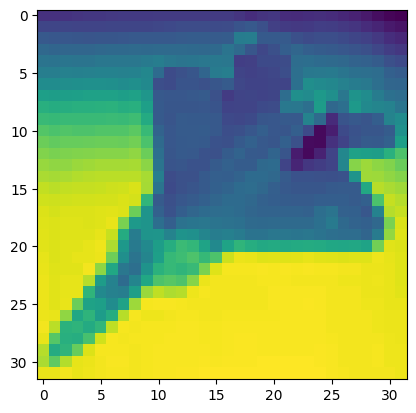

In [65]:
plt.imshow(samples[0][0])

## Implement Convolution Net

![image-17](image-17.png)


- in_channels (int) – Number of channels in the input image
- out_channels (int) – Number of channels produced by the convolution
- kernel_size (int or tuple) – Size of the convolving kernel

![image-18](image-18.png)


In [73]:
# images in a batch 
image = samples
print(image.shape)

conv1 = nn.Conv2d(3,6,5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6,16,5)

x = conv1(image)
print(x.shape) #input=32*32,filter=5*5,output=(32-5+0)/1 + 1 = 28*28

x = pool(x)
print(x.shape) #output pool by factor of 2 = 14*14

x = conv2(x)
print(x.shape) #output = (14-5+0)/1 + 1 = 10*10

x = pool(x)
print(x.shape) #output = 5*5

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [76]:
# implement convolution net
class ConvNet(nn.Module):
    
    def __init__(self):
        # define layers
        super(ConvNet,self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5) #(in_channels, out_channels, kernel_size)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # output from conv. layer = torch.Size([4, 16, 5, 5])
        # this output needs to be flattened to give input
        self.fc1 = nn.Linear(16*5*5, 120) #flatten, so resize 16*5*5
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        # forward pass with activation function
        
        x = self.pool(F.relu(self.conv1(x))) #conv layer, activation then pooling
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*5*5) # flatten
        x = F.relu(self.fc1(x)) #layer1
        x = F.relu(self.fc2(x)) #layer2
        x = self.fc3(x) #layer3
        
        return x
        

In [77]:
# create model 
model = ConvNet()

In [79]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [80]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i , (images, labels) in enumerate(train_loader):
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss:{loss.item():.4f}')
            
print('Finished Training')

Epoch [1/4], step [2000/12500], loss:2.3176
Epoch [1/4], step [4000/12500], loss:2.2849
Epoch [1/4], step [6000/12500], loss:2.2624
Epoch [1/4], step [8000/12500], loss:2.1707
Epoch [1/4], step [10000/12500], loss:2.0597
Epoch [1/4], step [12000/12500], loss:1.9619
Epoch [2/4], step [2000/12500], loss:1.6506
Epoch [2/4], step [4000/12500], loss:2.1115
Epoch [2/4], step [6000/12500], loss:1.5690
Epoch [2/4], step [8000/12500], loss:1.8880
Epoch [2/4], step [10000/12500], loss:1.7172
Epoch [2/4], step [12000/12500], loss:1.5701
Epoch [3/4], step [2000/12500], loss:1.1859
Epoch [3/4], step [4000/12500], loss:1.7065
Epoch [3/4], step [6000/12500], loss:1.5994
Epoch [3/4], step [8000/12500], loss:1.9572
Epoch [3/4], step [10000/12500], loss:0.6572
Epoch [3/4], step [12000/12500], loss:1.9874
Epoch [4/4], step [2000/12500], loss:0.7986
Epoch [4/4], step [4000/12500], loss:0.7303
Epoch [4/4], step [6000/12500], loss:1.5563
Epoch [4/4], step [8000/12500], loss:1.2510
Epoch [4/4], step [10000/1

In [88]:
# testing and evaluation
with torch.no_grad():
    n_correct =0
    n_samples =0
    n_class_correct =[0 for i in range(10)]
    n_class_samples =[0 for i in range(10)]
    
    for images, labels in test_loader:
        # forward -- softmax prediction 
        outputs = model(images)
        
        # actual prediction
        # value, index
        _, predictions = torch.max(outputs, 1) # multiclass pred
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(acc)

47.68
